<a href="https://colab.research.google.com/github/Aksana74/7CODEC-/blob/main/HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [45,190,200,40,70,54,150,120,110]
ks=[401,574,874,919,459,739,653,902,746,832]
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функции из библиотек  numpy и pandas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
zp=np.array([35,45,190,200,40,70,54,150,120,110])
ks=np.array([401,574,874,919,459,739,653,902,746,832])

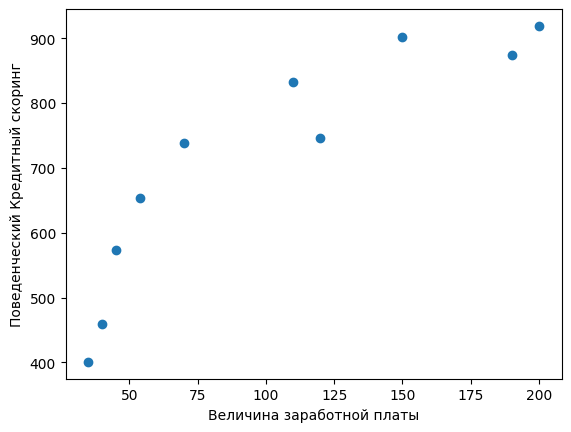

In [ ]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий Кредитный скоринг', rotation=90)
plt.show()

Из графика видим, что большим значениям заработной платы соответствут большие данные кредитного скоринга. Ожидается между этими двумя значениями выраженная положительная корреляция.

Найдем по формуле коэффициент ковариации.
COVx,y=M(XY)-M(x)*M(Y)

In [ ]:
def covar(array1,array2):
    MXY =sum(array1*array2)/len(array1)
    MX=sum(array1)/len(array1)
    MY=sum(array2)/len(array2)
    return MXY-MX*MY

In [ ]:
covar(zp,ks)

9157.839999999997

Функция cov из numpy:

In [ ]:
np.cov(zp,ks,ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Коэффициент корреляции Пирсона рассчитывается по формуле:
rx,y=covx,y/gx*gy. Для несмещенной ковариации берутся несмещенные значения среднего квадратичного отклонения, а для смещенной-смещенные.

In [ ]:
def sigma(array,offset=True):
    mean_array=sum(array)/len(array)
    square_dev=(array-mean_array)**2
    variance=sum(square_dev)/len(array) if offset else sum (square_dev)/(len(array)-1)
    return variance**0.5




In [ ]:
r=covar (zp,ks)/(sigma(zp)*sigma(ks))
print (f'Коэффициент корреляции r={r: .5f}')

Коэффициент корреляции r= 0.88749


In [ ]:
r1=np.cov(zp,ks,ddof=1)/(sigma(zp,offset=False)*sigma(ks,offset=False))
print (f'Коэффициент r = {r1}')

Коэффициент r = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


Используем функцию corrcoef библиотеки numpy

In [ ]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

Используем функцию corr библиотеки pandas

In [ ]:
df=pd.DataFrame(data={'zp':zp,'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [ ]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


Из графика видно, что имеется линейная взаимосвязь между исходными данными.

Задача 2 .
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131,125,115,122,131,115,107,99,125,111. Известно,что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0,95.

Будем использовать t-критерий и формулу

In [ ]:
arr=np.array ([131,125,115,122,131,115,107,99,125,111])
print(f'Среднее выборочное:{np.mean(arr): .2f},\n'
      f'Размер выбоки n={len(arr)},\n'
      f'Среднее квадратическое отклонение по выборке (несмещенное):{np.std(arr,ddof=1): .2f}.'
)

Среднее выборочное: 118.10,
Размер выбоки n=10,
Среднее квадратическое отклонение по выборке (несмещенное): 10.55.


In [ ]:
import scipy.stats as stats

In [ ]:
def t_from_table(confidens,len_array):
    alpha =(1-confidens)
    return stats.t.ppf(1-alpha/2, len_array-1)
print (f'Табличное значение t-критерия для доверительного интервала 95% данной выборки:{t_from_table(0.95,len(arr)): .3f}')

Табличное значение t-критерия для доверительного интервала 95% данной выборки: 2.262


In [ ]:
def confidens_int(arr, confidens):
    return round (np.mean(arr)-t_from_table(confidens, len(arr))*np.std(arr, ddof=1)/len(arr)**0.5,3),\
           round (np.mean(arr)+t_from_table(confidens,len(arr))*np.std(arr, ddof=1)/len(arr)**0.5,3)
print (f'95% доверительный интервал для истинного значения IQ: {confidens_int(arr, 0.95)}.')


95% доверительный интервал для истинного значения IQ: (110.556, 125.644).


Задача 3. Известно, что рост футболистов в сборной распределн нормально с дисперсией генеральной совокупности, сигма в 2 = 25 кв см Объем выборки n = 27, среднее выборочное M= 174,2. Найдите доверительный интервал для математического ожидания с альфа = 0,95.

Будем использовать Z-критерий для расчета 95 % доворительного интервала при дисперсии генеральной доверенности 25кв см


Рассчитаем границы доверительного интервала по формулe
M =174.2 - среднее значение выборки
Za/2 табличное значение Z-критерия, для 95% доверительного интервала Zа/2=1,96
дисперсия генеральной совокупности =25 ;
n = 27 объем выборки



In [ ]:
left=174.2-(1.96*25**0.5)/27**0.5
right=74.2+(1.96*25**0.5)/27**0.5
print (f'95% доверительный интервал для оценки мат.ожидания генеральной совокупности: [{left: .4f};{right: .4f}].')


95% доверительный интервал для оценки мат.ожидания генеральной совокупности: [ 172.3140; 76.0860].
